# DATA WRANGLING

## Step 1:  Data Importation and Initial Exploration

In [69]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
label = LabelEncoder()
scaler = StandardScaler()
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')

In [70]:
# Loading the Dataset and rounding numbers to 2 decimal places
school = pd.read_csv('data.csv', delimiter=';')
school.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [71]:
school['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [72]:
# Checking the number of rows and columns
school.shape

(4424, 37)

In [73]:
# Data types checking
school.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [74]:
school.rename(columns={'Nacionality' :'Nationality', 'Daytime/evening attendance\t':'Daytime/evening attendance'},inplace=True)

In [75]:
# Summary statistics
school.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


## Step 2: Data Cleaning and Validation


In [76]:
school['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

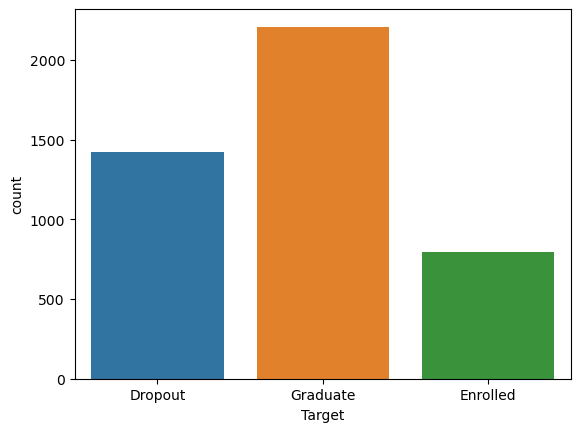

In [77]:
sns.countplot(data=school,x='Target',hue='Target')
plt.show()

In [78]:
school = school[~school['Target'].isin(['Enrolled'])]

In [79]:
school['Target'] = np.where(school['Target']=='Dropout',1,0)

In [80]:
# Checking for missing values
# school.isna().sum()
school.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [81]:
numeric_1 = [
'Age at enrollment',
'Previous qualification (grade)',
'Admission grade',
'Curricular units 1st sem (credited)',
'Curricular units 1st sem (enrolled)',
'Curricular units 1st sem (evaluations)',
'Curricular units 1st sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 1st sem (without evaluations)',
'Curricular units 2nd sem (credited)',
'Curricular units 2nd sem (enrolled)',
'Curricular units 2nd sem (evaluations)',
'Curricular units 2nd sem (approved)',
'Curricular units 2nd sem (grade)',
'Curricular units 2nd sem (without evaluations)',
'Unemployment rate',
'Inflation rate',
'GDP']


In [82]:
school.shape

(3630, 37)

In [83]:
school[numeric_1] = school[numeric_1].replace(0,np.nan)
school[numeric_1].isna().sum()

Age at enrollment                                    0
Previous qualification (grade)                       0
Admission grade                                      0
Curricular units 1st sem (credited)               3150
Curricular units 1st sem (enrolled)                152
Curricular units 1st sem (evaluations)             321
Curricular units 1st sem (approved)                647
Curricular units 1st sem (grade)                   647
Curricular units 1st sem (without evaluations)    3406
Curricular units 2nd sem (credited)               3183
Curricular units 2nd sem (enrolled)                152
Curricular units 2nd sem (evaluations)             372
Curricular units 2nd sem (approved)                802
Curricular units 2nd sem (grade)                   802
Curricular units 2nd sem (without evaluations)    3416
Unemployment rate                                    0
Inflation rate                                       0
GDP                                                  0
dtype: int

In [84]:
school.drop(['Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)', 'Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], axis=1, inplace=True)

In [85]:
school.isna().sum()

Marital status                              0
Application mode                            0
Application order                           0
Course                                      0
Daytime/evening attendance                  0
Previous qualification                      0
Previous qualification (grade)              0
Nationality                                 0
Mother's qualification                      0
Father's qualification                      0
Mother's occupation                         0
Father's occupation                         0
Admission grade                             0
Displaced                                   0
Educational special needs                   0
Debtor                                      0
Tuition fees up to date                     0
Gender                                      0
Scholarship holder                          0
Age at enrollment                           0
International                               0
Curricular units 1st sem (enrolled

In [86]:
numeric = [
'Age at enrollment',
'Previous qualification (grade)',
'Admission grade',
'Curricular units 1st sem (enrolled)',
'Curricular units 1st sem (evaluations)',
'Curricular units 1st sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 2nd sem (enrolled)',
'Curricular units 2nd sem (evaluations)',
'Curricular units 2nd sem (approved)',
'Curricular units 2nd sem (grade)',
'Unemployment rate',
'Inflation rate',
'GDP']


categorical = ["Mother's occupation","Father's occupation", 'Marital status',
'Application mode','Course',"Previous qualification",'Application order',"Mother's qualification","Father's qualification",'Nationality']
oe = ["Mother's occupation","Father's occupation",
'Application mode','Course',"Mother's qualification","Father's qualification"]
le = ['Application order',"Previous qualification",'Marital status','Nationality']

In [87]:
for c in categorical:
  school[c] = school[c].astype(str)

In [88]:
data =school[school['Curricular units 1st sem (enrolled)'].isna()]
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,NaN,NaN,NaN,NaN,NaN,NaN,10.8,1.4,1.74,1
20,1,1,3,171,1,1,122.0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,11.1,0.6,2.02,0
66,1,1,3,171,1,1,139.0,1,19,19,...,NaN,NaN,NaN,NaN,NaN,NaN,10.8,1.4,1.74,0
72,1,1,1,171,1,1,141.0,1,19,19,...,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2.8,-4.06,1
101,1,1,4,171,1,1,133.1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,16.2,0.3,-0.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,1,44,1,171,1,39,110.0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,12.4,0.5,1.79,1
4331,1,17,1,171,1,1,145.0,1,37,19,...,NaN,NaN,NaN,NaN,NaN,NaN,11.1,0.6,2.02,1
4353,1,1,1,171,1,1,141.0,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,12.4,0.5,1.79,0
4365,1,1,2,171,1,1,117.0,1,38,38,...,NaN,NaN,NaN,NaN,NaN,NaN,7.6,2.6,0.32,0


In [89]:
no_details = school[(school['Curricular units 1st sem (approved)'].isna()) & (school['Curricular units 1st sem (enrolled)'].isna()) & (school['Curricular units 1st sem (grade)'].isna())]
no_details
# notnull =school[school['Curricular units 1st sem (credited)'].notnull()][['Course','Curricular units 1st sem (credited)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)']]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,NaN,NaN,NaN,NaN,NaN,NaN,10.8,1.4,1.74,1
20,1,1,3,171,1,1,122.0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,11.1,0.6,2.02,0
66,1,1,3,171,1,1,139.0,1,19,19,...,NaN,NaN,NaN,NaN,NaN,NaN,10.8,1.4,1.74,0
72,1,1,1,171,1,1,141.0,1,19,19,...,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2.8,-4.06,1
101,1,1,4,171,1,1,133.1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,16.2,0.3,-0.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,1,44,1,171,1,39,110.0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,12.4,0.5,1.79,1
4331,1,17,1,171,1,1,145.0,1,37,19,...,NaN,NaN,NaN,NaN,NaN,NaN,11.1,0.6,2.02,1
4353,1,1,1,171,1,1,141.0,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,12.4,0.5,1.79,0
4365,1,1,2,171,1,1,117.0,1,38,38,...,NaN,NaN,NaN,NaN,NaN,NaN,7.6,2.6,0.32,0


In [90]:
no_details['Course'].unique()

array(['171'], dtype=object)

In [91]:
school_df = school[school['Course']!='171']
school_df.isna().sum()

Marital status                              0
Application mode                            0
Application order                           0
Course                                      0
Daytime/evening attendance                  0
Previous qualification                      0
Previous qualification (grade)              0
Nationality                                 0
Mother's qualification                      0
Father's qualification                      0
Mother's occupation                         0
Father's occupation                         0
Admission grade                             0
Displaced                                   0
Educational special needs                   0
Debtor                                      0
Tuition fees up to date                     0
Gender                                      0
Scholarship holder                          0
Age at enrollment                           0
International                               0
Curricular units 1st sem (enrolled

In [92]:
school_df[(school_df['Curricular units 1st sem (approved)'].notna()) & school_df['Curricular units 1st sem (evaluations)'].isna()]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target


In [93]:
school_df[(school_df['Curricular units 1st sem (grade)'].notna()) & school_df['Curricular units 1st sem (evaluations)'].isna()]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target


In [94]:
school_df[(school_df['Curricular units 1st sem (grade)'].isna()) & school_df['Curricular units 1st sem (approved)'].notna()]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target


In [95]:
school_df[numeric] = school_df[numeric].replace(0,np.nan)
school_df[numeric].isna().sum()

Age at enrollment                           0
Previous qualification (grade)              0
Admission grade                             0
Curricular units 1st sem (enrolled)         0
Curricular units 1st sem (evaluations)    169
Curricular units 1st sem (approved)       495
Curricular units 1st sem (grade)          495
Curricular units 2nd sem (enrolled)         0
Curricular units 2nd sem (evaluations)    220
Curricular units 2nd sem (approved)       650
Curricular units 2nd sem (grade)          650
Unemployment rate                           0
Inflation rate                              0
GDP                                         0
dtype: int64

In [96]:
ms = school_df['Marital status'].value_counts(normalize=True)
ms

Marital status
1    0.876014
2    0.093859
4    0.021727
5    0.006373
6    0.001448
3    0.000579
Name: proportion, dtype: float64

In [97]:
school_df.loc[school_df['Marital status'].isin(ms[ms<0.1].index),'Marital status'] = 'others'
school_df['Marital status'].value_counts(normalize=True)

Marital status
1         0.876014
others    0.123986
Name: proportion, dtype: float64

In [98]:
pq = school_df["Previous qualification"].value_counts(normalize=True)
pq

Previous qualification
1     0.827346
39    0.045481
19    0.042584
3     0.034473
12    0.011008
40    0.009849
42    0.007822
2     0.006083
6     0.004345
9     0.003187
4     0.002028
43    0.001738
38    0.001738
10    0.001159
15    0.000579
5     0.000290
14    0.000290
Name: proportion, dtype: float64

In [99]:

school_df.loc[school_df["Previous qualification"].isin(pq[pq<0.05].index),"Previous qualification"] = 'others'
school_df["Previous qualification"].value_counts(normalize=True)

Previous qualification
1         0.827346
others    0.172654
Name: proportion, dtype: float64

In [100]:
crs = school["Course"].value_counts(normalize=True)

In [101]:
mo = school_df["Mother's occupation"].value_counts(normalize=True)
mo

Mother's occupation
9      0.363268
4      0.184531
5      0.119351
3      0.074739
2      0.062283
7      0.061414
0      0.040846
1      0.024044
6      0.022016
90     0.020278
8      0.008111
99     0.004345
191    0.004345
141    0.001159
194    0.001159
123    0.001159
193    0.001159
144    0.001159
192    0.000579
175    0.000579
151    0.000579
134    0.000579
153    0.000579
125    0.000290
132    0.000290
143    0.000290
171    0.000290
10     0.000290
152    0.000290
Name: proportion, dtype: float64

In [102]:

school_df.loc[school_df["Mother's occupation"].isin(mo[mo<0.01].index),"Mother's occupation"] = 'others'
school_df["Mother's occupation"].value_counts(normalize=True)

Mother's occupation
9         0.363268
4         0.184531
5         0.119351
3         0.074739
2         0.062283
7         0.061414
0         0.040846
others    0.027231
1         0.024044
6         0.022016
90        0.020278
Name: proportion, dtype: float64

In [103]:
fo = school_df["Father's occupation"].value_counts(normalize=True)
fo

Father's occupation
9      0.233198
7      0.153534
5      0.112978
4      0.086616
3      0.086037
8      0.072711
10     0.058227
6      0.054751
2      0.038239
0      0.035921
1      0.029548
90     0.018830
99     0.004925
193    0.001738
144    0.001448
192    0.001159
171    0.000869
103    0.000579
194    0.000579
175    0.000579
151    0.000579
135    0.000579
181    0.000579
163    0.000579
174    0.000290
112    0.000290
122    0.000290
101    0.000290
141    0.000290
114    0.000290
154    0.000290
153    0.000290
131    0.000290
183    0.000290
102    0.000290
152    0.000290
172    0.000290
143    0.000290
182    0.000290
195    0.000290
124    0.000290
123    0.000290
Name: proportion, dtype: float64

In [104]:
school_df.loc[school_df["Father's occupation"].isin(fo[fo<0.01].index),"Father's occupation"] = 'others'
school_df["Father's occupation"].value_counts(normalize=True)

Father's occupation
9         0.233198
7         0.153534
5         0.112978
4         0.086616
3         0.086037
8         0.072711
10        0.058227
6         0.054751
2         0.038239
0         0.035921
1         0.029548
others    0.019409
90        0.018830
Name: proportion, dtype: float64

In [105]:
mq = school_df["Mother's qualification"].value_counts(normalize=True)
mq

Mother's qualification
1     0.237254
37    0.234067
19    0.214079
38    0.132387
3     0.088355
34    0.036501
2     0.016512
12    0.010429
4     0.009270
5     0.004345
9     0.002028
40    0.001738
41    0.001738
39    0.001448
42    0.001159
6     0.001159
36    0.000869
43    0.000869
11    0.000869
35    0.000869
30    0.000869
14    0.000579
10    0.000579
29    0.000579
18    0.000290
22    0.000290
27    0.000290
26    0.000290
44    0.000290
Name: proportion, dtype: float64

In [106]:
school_df.loc[school_df["Mother's qualification"].isin(mq[mq<0.01].index),"Mother's qualification"] = 'others'
school_df["Mother's qualification"].value_counts(normalize=True)

Mother's qualification
1         0.237254
37        0.234067
19        0.214079
38        0.132387
3         0.088355
34        0.036501
others    0.030417
2         0.016512
12        0.010429
Name: proportion, dtype: float64

In [107]:
fq = school_df["Father's qualification"].value_counts(normalize=True)
fq

Father's qualification
37    0.280707
19    0.217265
1     0.199305
38    0.160487
3     0.058227
34    0.031286
2     0.011008
4     0.008401
12    0.008401
5     0.004345
39    0.003766
11    0.002897
36    0.002317
9     0.001448
40    0.001159
14    0.001159
22    0.001159
30    0.000869
29    0.000579
26    0.000579
35    0.000579
6     0.000579
43    0.000290
27    0.000290
33    0.000290
44    0.000290
25    0.000290
20    0.000290
10    0.000290
42    0.000290
18    0.000290
13    0.000290
41    0.000290
31    0.000290
Name: proportion, dtype: float64

In [108]:
school_df.loc[school_df["Father's qualification"].isin(fq[fq<0.01].index),"Father's qualification"] = 'others'
school_df["Father's qualification"].value_counts(normalize=True)

Father's qualification
37        0.280707
19        0.217265
1         0.199305
38        0.160487
3         0.058227
others    0.041715
34        0.031286
2         0.011008
Name: proportion, dtype: float64

In [109]:
nat = school_df["Nationality"].value_counts(normalize=True)
nat

Nationality
1      0.977115
41     0.007532
22     0.003476
26     0.002607
6      0.002317
24     0.001448
11     0.000869
103    0.000869
100    0.000579
2      0.000579
25     0.000290
101    0.000290
62     0.000290
13     0.000290
109    0.000290
21     0.000290
14     0.000290
17     0.000290
105    0.000290
Name: proportion, dtype: float64

In [110]:
school_df.loc[school["Nationality"].isin(nat[nat<0.9].index),"Nationality"] = 'others'
school_df["Nationality"].value_counts(normalize=True)


Nationality
1         0.977115
others    0.022885
Name: proportion, dtype: float64

In [111]:
am = school_df["Application mode"].value_counts(normalize=True)
am

Application mode
1     0.373696
17    0.199305
39    0.189745
43    0.066338
44    0.043743
7     0.037659
18    0.030417
42    0.018830
51    0.013036
16    0.007532
53    0.006952
15    0.005794
10    0.002897
5     0.002317
2     0.000869
57    0.000290
26    0.000290
27    0.000290
Name: proportion, dtype: float64

In [112]:
school_df.loc[school["Application mode"].isin(am[am<0.01].index),"Application mode"] = 'others'
school_df["Application mode"].value_counts(normalize=True)

Application mode
1         0.373696
17        0.199305
39        0.189745
43        0.066338
44        0.043743
7         0.037659
18        0.030417
others    0.027231
42        0.018830
51        0.013036
Name: proportion, dtype: float64

In [113]:
school_df['Target'].value_counts()

Target
0    2113
1    1339
Name: count, dtype: int64

In [114]:
school_df[numeric] = school_df[numeric].replace(np.nan,0)
school_df[numeric].isna().sum()

Age at enrollment                         0
Previous qualification (grade)            0
Admission grade                           0
Curricular units 1st sem (enrolled)       0
Curricular units 1st sem (evaluations)    0
Curricular units 1st sem (approved)       0
Curricular units 1st sem (grade)          0
Curricular units 2nd sem (enrolled)       0
Curricular units 2nd sem (evaluations)    0
Curricular units 2nd sem (approved)       0
Curricular units 2nd sem (grade)          0
Unemployment rate                         0
Inflation rate                            0
GDP                                       0
dtype: int64

In [115]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 1 to 4423
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marital status                          3452 non-null   object 
 1   Application mode                        3452 non-null   object 
 2   Application order                       3452 non-null   object 
 3   Course                                  3452 non-null   object 
 4   Daytime/evening attendance              3452 non-null   int64  
 5   Previous qualification                  3452 non-null   object 
 6   Previous qualification (grade)          3452 non-null   float64
 7   Nationality                             3452 non-null   object 
 8   Mother's qualification                  3452 non-null   object 
 9   Father's qualification                  3452 non-null   object 
 10  Mother's occupation                     3452 non-null   object 
 

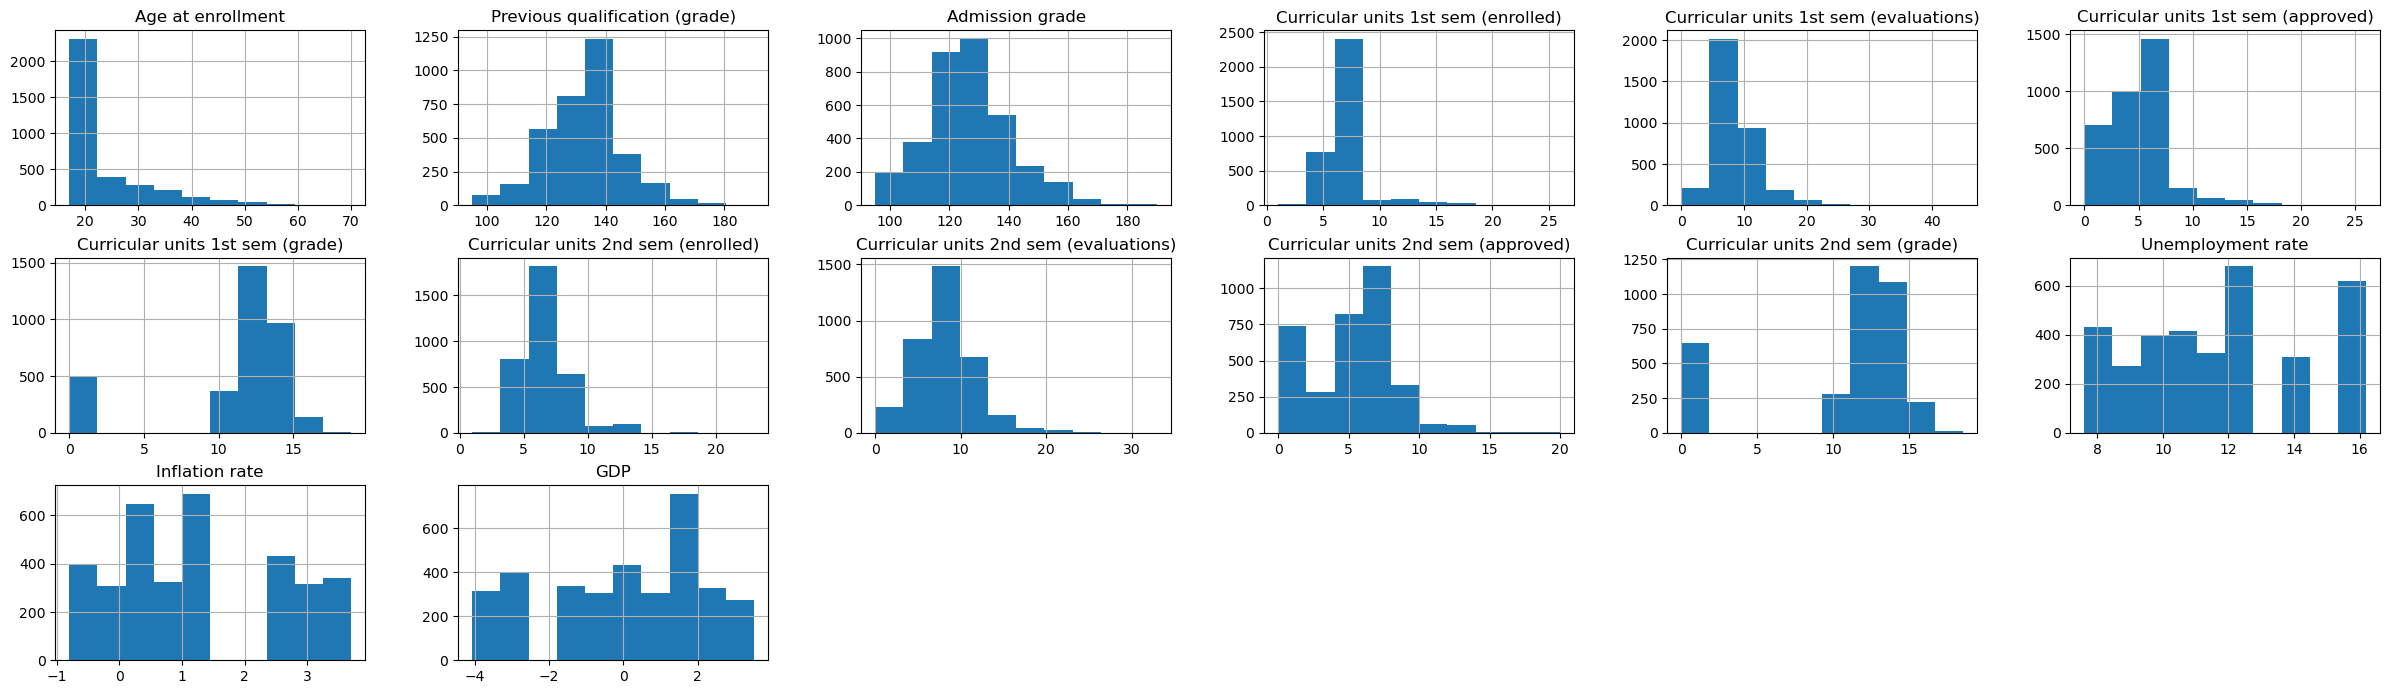

In [116]:
school_df[numeric].hist(figsize=(30,20),layout=(7,6))
plt.show()

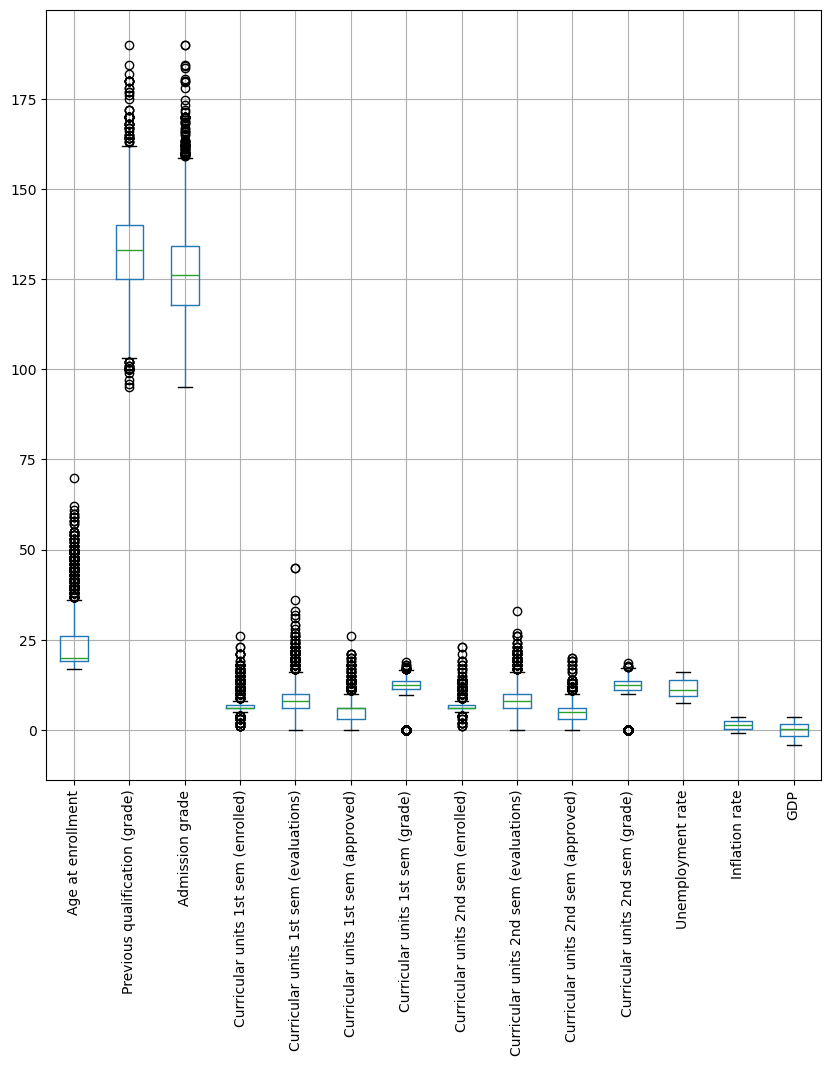

In [117]:
fig = plt.figure(figsize=(10,10))
school_df[numeric].boxplot()
plt.xticks(rotation=90)
plt.show()

In [118]:
# Checking for duplicates
school_df.duplicated().sum()

0

In [119]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 1 to 4423
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marital status                          3452 non-null   object 
 1   Application mode                        3452 non-null   object 
 2   Application order                       3452 non-null   object 
 3   Course                                  3452 non-null   object 
 4   Daytime/evening attendance              3452 non-null   int64  
 5   Previous qualification                  3452 non-null   object 
 6   Previous qualification (grade)          3452 non-null   float64
 7   Nationality                             3452 non-null   object 
 8   Mother's qualification                  3452 non-null   object 
 9   Father's qualification                  3452 non-null   object 
 10  Mother's occupation                     3452 non-null   object 
 

## Step 3: Data Transformation

In [120]:
# scale = scaler.fit_transform(school_df[numeric])
# school_df[numeric] = scale
# school_df['Admission grade'] = np.log(school_df['Admission grade'])

In [121]:
oh = onehot.fit_transform(school_df[oe])
school_df = pd.concat([school_df,oh],axis=1)
for c in le:
    school_df[c] = label.fit_transform(school_df[c])
school_df.drop(columns=oe,inplace=True)
school_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 1 to 4423
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marital status                          3452 non-null   int32  
 1   Application order                       3452 non-null   int32  
 2   Daytime/evening attendance              3452 non-null   int64  
 3   Previous qualification                  3452 non-null   int32  
 4   Previous qualification (grade)          3452 non-null   float64
 5   Nationality                             3452 non-null   int32  
 6   Admission grade                         3452 non-null   float64
 7   Displaced                               3452 non-null   int64  
 8   Educational special needs               3452 non-null   int64  
 9   Debtor                                  3452 non-null   int64  
 10  Tuition fees up to date                 3452 non-null   int64  
 

## Step 4:  Statistical Analysis

In [122]:
# Descriptive Analysis
school_df.describe()

,Marital status,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Admission grade,Displaced,Educational special needs,Debtor,...,Mother's qualification_38,Mother's qualification_others,Father's qualification_1,Father's qualification_19,Father's qualification_2,Father's qualification_3,Father's qualification_34,Father's qualification_37,Father's qualification_38,Father's qualification_others
count,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,...,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000
mean,0.123986,1.758401,0.881808,0.172654,132.634965,0.022885,126.820075,0.535052,0.010429,0.113557,...,0.132387,0.030417,0.199305,0.217265,0.011008,0.058227,0.031286,0.280707,0.160487,0.041715
std,0.329613,1.343228,0.322883,0.378002,13.058574,0.149559,14.357073,0.498842,0.101602,0.317319,...,0.338960,0.171757,0.399535,0.412444,0.104356,0.234206,0.174115,0.449410,0.367110,0.199966
min,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,95.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,125.000000,0.000000,117.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,133.100000,0.000000,126.200000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,1.000000,0.000000,140.000000,0.000000,134.300000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,6.000000,1.000000,1.000000,190.000000,1.000000,190.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


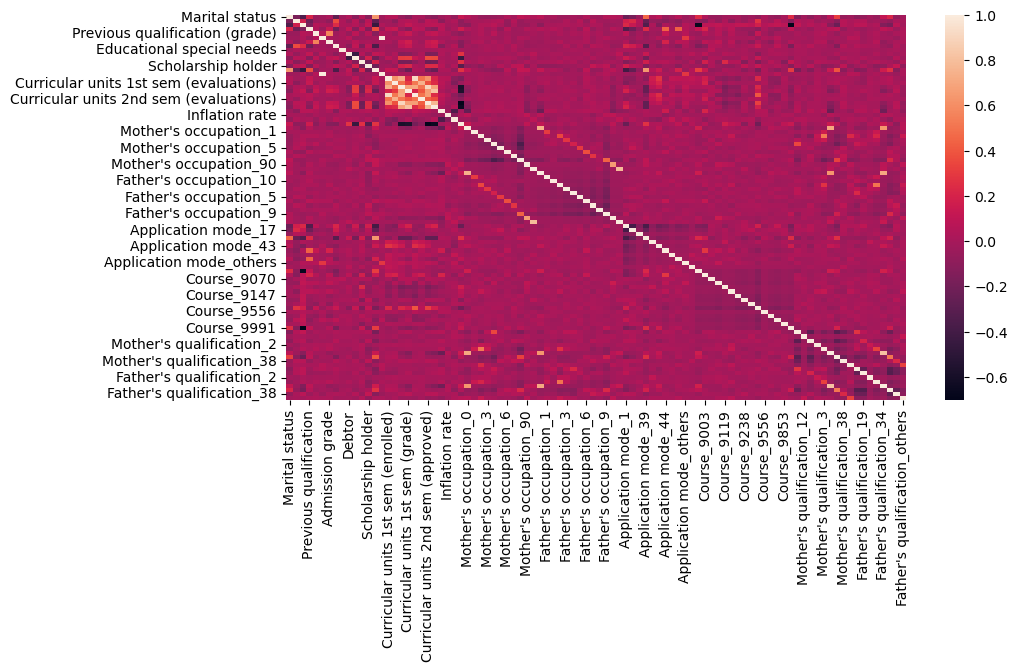

In [123]:
# Correlation Analysis
fig = plt.figure(figsize=(10,5))
sns.heatmap(school_df.corr())
plt.show()

Hypotheses
1. Higher socio-economic status correlates with lower dropout rates.
2. Students with higher admission grades are less likely to drop out.
3. Dropout rates are lower among students receiving financial aid or scholarships.

### 2. Students with higher admission grades are less likely to drop out.
Ho: Admission grades are the same for all groups.\
Ha: Students with higher admission grades are less likely to drop out.

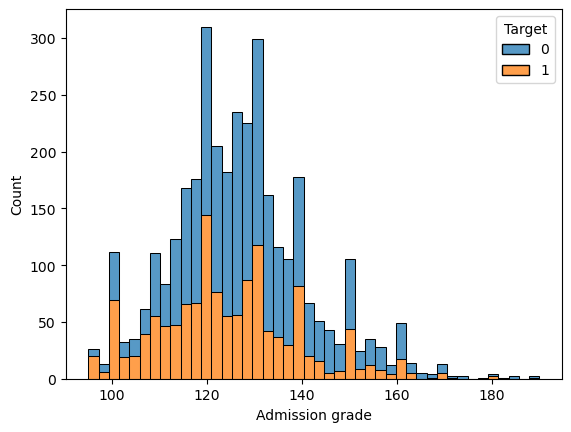

In [124]:
sns.histplot(data=school_df,x='Admission grade',hue='Target',multiple='stack')
plt.show()

In [125]:
school_df['a'] = pd.qcut(school_df['Admission grade'],6)
school_df.groupby('a')['Target'].mean()
school_df.drop('a',axis=1,inplace=True)

In [126]:
school_df['AdmGrades_category'] = np.where(school_df['Admission grade']<140,0,1)
school_df['AdmGrades_category'].value_counts()

AdmGrades_category
0    2838
1     614
Name: count, dtype: int64

In [127]:
school_df.groupby('Target')['AdmGrades_category'].value_counts()

Target  AdmGrades_category
0       0                     1722
        1                      391
1       0                     1116
        1                      223
Name: count, dtype: int64

In [128]:
n_highest = np.array([391,223])
n_rows = np.array([391+1722,223+1116])

In [129]:
alpha = 0.05
z_score,p_value = proportions_ztest(count = n_highest,nobs = n_rows, alternative='smaller')
print(z_score)
print(p_value)


1.3852292754960513
0.9170088141758889


The p-value is higher than a significant level of 0.05 so we fail to reject the null hypothesis and conclude that Admission grades are the same for all groups.

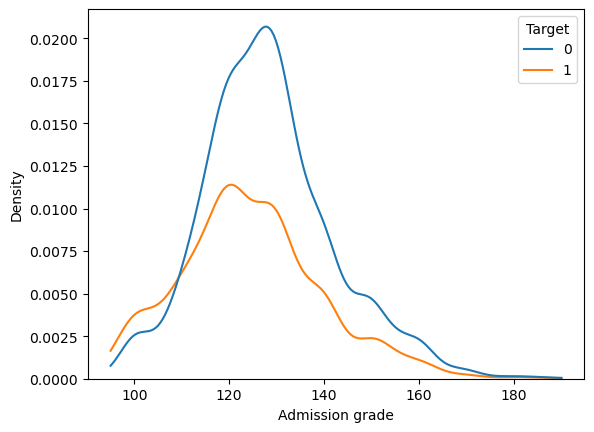

In [130]:
# Visualizing Target categories and Tuition fees up to date
sns.kdeplot(data=school_df, x='Admission grade',hue='Target', cut=0)
plt.show()

### 3. Dropout rates are lower among students receiving financial aid or scholarships.\

Ho: Students receiving financial aid or scholarships and Dropout rates are independent.\
Ha: Students receiving financial aid or scholarships and Dropout rates are not independent.

In [131]:
# Target proportions
school_df['Target'].value_counts(normalize=True)

Target
0    0.612109
1    0.387891
Name: proportion, dtype: float64

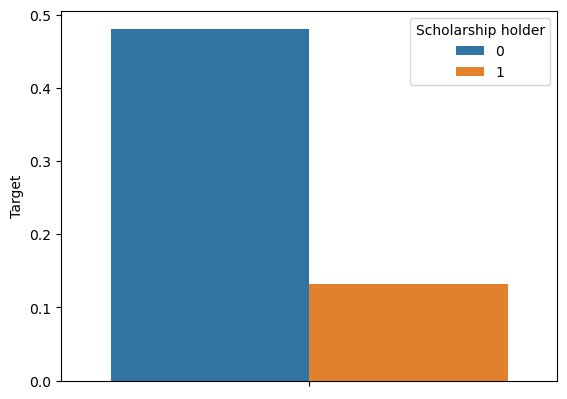

In [132]:
# Visualizing Target categories and Tuition fees up to date
sns.barplot(data=school_df, y='Target',hue='Scholarship holder', ci=None)
plt.show()

In [133]:
props = school_df.groupby('Scholarship holder')['Target'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props

Target,0,1
Scholarship holder,,
0,0.518782,0.481218
1,0.867822,0.132178


<Axes: xlabel='Scholarship holder'>

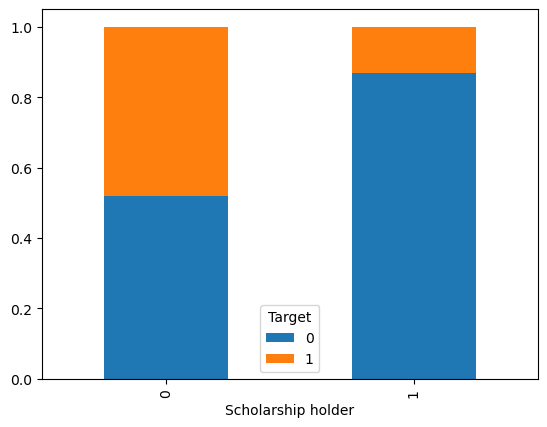

In [134]:
# Visualizing stacked bar of Target categories and Scholarship holder
props = school_df.groupby('Scholarship holder')['Target'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar',stacked=True)

In [135]:
alpha = 0.05
expected, observed, stats = pingouin.chi2_independence(data=school_df, x='Scholarship holder',y='Target')
print(stats[stats['test']=='pearson']['pval'])

0    4.043319e-77
Name: pval, dtype: float64


The p-value is less than a significant level of 0.05 so we reject the null hypothesis and conclude that Students receiving financial aid or scholarships and Dropout rates are not independent.

## Step 5

In [136]:
school_df.to_csv('cleaned_data.csv')